# Analisando dados da Netflix

Para começar, precisamos baixar o arquivo na plataforma da Kaggle (https://www.kaggle.com/datasets/arnavsmayan/netflix-userbase-dataset).

In [45]:
# importando os pacotes que iremos utilizar

import pandas as pd

# Coleta dos Dados

A primeira etapa, de coleta, envolve baixar e importar os dados da Netflix para o nosso ambiente.

Feito isso, utilizamos a função read_csv para importar o arquivo.

Nosso arquivo possui 10 colunas, e todas trazem informações sobre os usuários que utilizam a plataforma.

In [2]:
# importando os dados da Netflix

df_netflix = pd.read_csv('netflix.csv')
df_netflix

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


# Limpeza dos dados

Vamos começar a entender como nossos dados estão. Iremos explorar os tipos de dados que temos em cada coluna, e iremos checar dados nulos.

In [3]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


Com a função info() observamos que não temos dados nulos, vamos confirmar? Depois, iremos renomear as colunas para português e transformar a informação de algumas colunas.

In [4]:
df_netflix.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

Agora, com os dados transformados, vamos analisá-los!

# Analisando os dados

In [6]:
# Iniciando nossa análise exploratória, é importante entendermos os nossos dados de forma geral. Para isso, podemos rodar o comando describe()
# para trazer as estatísticas descritivas das colunas numéricas da nossa tabela.

# id_usuario: essa coluna é uma coluna de identificador, então as estatísticas aqui mostradas não possuem valor para nós. Iremos ignorá-las.
# receita_mensal: a partir das estatísticas extraídas dessa coluna, podemos notar que, a média da receita mensal por usuário é cerca de $ 12,5 por usuário,
                # com esse valor variando entre $ 10 e % 15.

# idade_usuario: a idade média dos usuários que adquiriram a assinatura da netflix é de 38 anos, com a idade mínima de 26 anos e máxima de 51.
# duracao_plano: a duração do plano aqui é referente a duração do pacote, como todo serviço de streaming, esse serviço é renovado mensalmente, então em todos os casos,
# a duração é a mesma de um mês.

df_netflix.describe()

,id_usuario,receita_mensal,idade_usuario,duracao_plano
count,2500.00000,2500.000000,2500.000000,2500.0
mean,1250.50000,12.508400,38.795600,1.0
std,721.83216,1.686851,7.171778,0.0
min,1.00000,10.000000,26.000000,1.0
25%,625.75000,11.000000,32.000000,1.0
50%,1250.50000,12.000000,39.000000,1.0
75%,1875.25000,14.000000,45.000000,1.0
max,2500.00000,15.000000,51.000000,1.0


In [7]:
# há quanto tempo as pessoas estão inscritas na Netflix?
df_netflix['duracao_assinatura'] = df_netflix['dt_ultimo_pagamento'] - df_netflix['dt_assinatura']
df_netflix['duracao_assinatura'] = df_netflix['duracao_assinatura'].dt.days.astype('int')
df_netflix

,id_usuario,tipo_plano,receita_mensal,dt_assinatura,dt_ultimo_pagamento,pais_usuario,idade_usuario,so_usuario,duracao_plano,duracao_assinatura
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Smartphone,1,629
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Tablet,1,774
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Smart TV,1,119
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Laptop,1,262
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Smartphone,1,174
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,2022-07-25,2023-12-07,Spain,28,Smart TV,1,500
2496,2497,Basic,15,2022-04-08,2023-07-14,Spain,33,Smart TV,1,462
2497,2498,Standard,12,2022-09-08,2023-07-15,United States,38,Laptop,1,310
2498,2499,Standard,13,2022-12-08,2023-12-07,Canada,48,Tablet,1,364


In [8]:
# Com base na função describe() percebemos que a média de tempo que as pessoas se inscrevem é de cerca de 326 dias, quase um ano.
# Mas, pera aí, o que são esse números negativos no minimo?
df_netflix.describe()

,id_usuario,receita_mensal,idade_usuario,duracao_plano,duracao_assinatura
count,2500.00000,2500.000000,2500.000000,2500.0,2500.000000
mean,1250.50000,12.508400,38.795600,1.0,326.102000
std,721.83216,1.686851,7.171778,0.0,118.638034
min,1.00000,10.000000,26.000000,1.0,-159.000000
25%,625.75000,11.000000,32.000000,1.0,247.000000
50%,1250.50000,12.000000,39.000000,1.0,331.000000
75%,1875.25000,14.000000,45.000000,1.0,401.250000
max,2500.00000,15.000000,51.000000,1.0,776.000000


In [9]:
# vamos validar esses numeros?
df_netflix[(df_netflix['duracao_assinatura'] < 0)]

,id_usuario,tipo_plano,receita_mensal,dt_assinatura,dt_ultimo_pagamento,pais_usuario,idade_usuario,so_usuario,duracao_plano,duracao_assinatura
9,10,Premium,15,2023-07-01,2023-06-22,Italy,44,Smart TV,1,-9
14,15,Standard,12,2023-09-05,2023-06-28,Germany,38,Smart TV,1,-69
20,21,Premium,15,2023-10-06,2023-06-22,United States,26,Laptop,1,-106
34,35,Basic,10,2023-11-04,2023-06-28,Germany,39,Smart TV,1,-129
39,40,Basic,10,2023-07-03,2023-06-22,Italy,48,Tablet,1,-11
60,61,Premium,15,2023-08-02,2023-06-22,United States,28,Laptop,1,-41
69,70,Basic,10,2023-08-05,2023-06-22,Italy,41,Smartphone,1,-44
80,81,Premium,10,2023-11-01,2023-06-24,United States,37,Tablet,1,-130
108,109,Standard,13,2023-08-02,2023-06-25,Spain,35,Tablet,1,-38
129,130,Basic,14,2023-07-01,2023-06-23,Italy,43,Tablet,1,-8


In [10]:
# Encontramos 13 valores inconsistentes, onde o dado não faz sentido. Como não possuímos contexto suficiente sobre essa tabela para entender
# o motivo de termos dt_ultimo_pagamento maior que dt_assinatura, iremos retirar essas linhas para não enviezar nossos resultados.

df_netflix = df_netflix.drop(df_netflix[df_netflix['duracao_assinatura'] < 0].index)
df_netflix

,id_usuario,tipo_plano,receita_mensal,dt_assinatura,dt_ultimo_pagamento,pais_usuario,idade_usuario,so_usuario,duracao_plano,duracao_assinatura
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Smartphone,1,629
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Tablet,1,774
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Smart TV,1,119
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Laptop,1,262
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Smartphone,1,174
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,2022-07-25,2023-12-07,Spain,28,Smart TV,1,500
2496,2497,Basic,15,2022-04-08,2023-07-14,Spain,33,Smart TV,1,462
2497,2498,Standard,12,2022-09-08,2023-07-15,United States,38,Laptop,1,310
2498,2499,Standard,13,2022-12-08,2023-12-07,Canada,48,Tablet,1,364


In [11]:
# Agora sim, tirando os dados negativos, nossa média de duração de assinatura subiu um pouco, e agora podemos visualizar que o tempo mínimo
# que as pessoas assinam a netflix é de 8 dias, e o máximo da base é 776 dias.

df_netflix.describe()

,id_usuario,receita_mensal,idade_usuario,duracao_plano,duracao_assinatura
count,2487.000000,2487.000000,2487.000000,2487.0,2487.000000
mean,1256.586651,12.509047,38.808605,1.0,328.172497
std,718.761045,1.685147,7.172535,0.0,115.368881
min,1.000000,10.000000,27.000000,1.0,8.000000
25%,635.500000,11.000000,32.000000,1.0,249.000000
50%,1257.000000,12.000000,39.000000,1.0,331.000000
75%,1878.500000,14.000000,45.000000,1.0,402.000000
max,2500.000000,15.000000,51.000000,1.0,776.000000


In [12]:
# Antes de continuarmos nossa análise, existe mais um passo que devemos fazer: resetar o index. Como retiramos algumas linhas da nossa tabela, o
# índice, ou seja, coluna mais à esquerda, porem ela ainda está com o intervalo de 1-2499.

df_netflix = df_netflix.reset_index(drop=True)
df_netflix

# agora sim! nossa coluna de index está coerente. Vamos continuar!

,id_usuario,tipo_plano,receita_mensal,dt_assinatura,dt_ultimo_pagamento,pais_usuario,idade_usuario,so_usuario,duracao_plano,duracao_assinatura
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Smartphone,1,629
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Tablet,1,774
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Smart TV,1,119
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Laptop,1,262
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Smartphone,1,174
...,...,...,...,...,...,...,...,...,...,...
2482,2496,Premium,14,2022-07-25,2023-12-07,Spain,28,Smart TV,1,500
2483,2497,Basic,15,2022-04-08,2023-07-14,Spain,33,Smart TV,1,462
2484,2498,Standard,12,2022-09-08,2023-07-15,United States,38,Laptop,1,310
2485,2499,Standard,13,2022-12-08,2023-12-07,Canada,48,Tablet,1,364


In [13]:
# outra análise interessante de se fazer, será que existe um mês com um maior número de vendas?

df_netflix['dt_mes'] = df_netflix['dt_assinatura'].dt.month
dt_inicio = df_netflix['dt_mes'].value_counts()
dt_inicio

10    417
7     393
6     338
9     305
8     292
5     135
11    119
4     108
3     103
12     97
2      92
1      88
Name: dt_mes, dtype: int64

In [14]:
# Utilizando a função value_counts() conseguimos ter uma ideia de qual é a assinatura mais comum, porém, em números absolutos
# é dificil entender a proporção entre os 3 planos.

tipo_plano = df_netflix["tipo_plano"].value_counts()
tipo_plano

Basic       994
Standard    764
Premium     729
Name: tipo_plano, dtype: int64

In [15]:
# Para isso, colocamos um parâmetro dentro da nossa função, e ele nos devolve os valores em porcentagem sobre o total.
tipo_plano_perc = df_netflix["tipo_plano"].value_counts(normalize=True)
tipo_plano_perc

# daqui, percebemos que o pacote mais recorrente é o Basic.

Basic       0.399678
Standard    0.307197
Premium     0.293124
Name: tipo_plano, dtype: float64

In [16]:
# Vamos entender também, quais sao os países com o maior número de assinaturas:

pais_usuario = df_netflix["pais_usuario"].value_counts()
pais_usuario

Spain             450
United States     448
Canada            317
France            183
Brazil            183
Mexico            183
United Kingdom    182
Australia         182
Germany           181
Italy             178
Name: pais_usuario, dtype: int64

In [17]:
pais_usuario_perc = df_netflix["pais_usuario"].value_counts(normalize=True)
pais_usuario_perc

Spain             0.180941
United States     0.180137
Canada            0.127463
France            0.073583
Brazil            0.073583
Mexico            0.073583
United Kingdom    0.073181
Australia         0.073181
Germany           0.072778
Italy             0.071572
Name: pais_usuario, dtype: float64

In [18]:
# Vamos criar intervalos de idade para entender melhor nossos usuários?
# Iremos criar categorias de idades com o intervalo de 4 em 4 anos.
# ou seja, 20-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59, +60

df_netflix.loc[df_netflix['idade_usuario'] < 25, 'grupo_idade'] = '20-24'
df_netflix.loc[(df_netflix['idade_usuario'] >= 25) & (df_netflix['idade_usuario'] < 30), 'grupo_idade'] = '25-29'
df_netflix.loc[(df_netflix['idade_usuario'] >= 30) & (df_netflix['idade_usuario'] < 35), 'grupo_idade'] = '30-34'
df_netflix.loc[(df_netflix['idade_usuario'] >= 35) & (df_netflix['idade_usuario'] < 40), 'grupo_idade'] = '35-39'
df_netflix.loc[(df_netflix['idade_usuario'] >= 40) & (df_netflix['idade_usuario'] < 45), 'grupo_idade'] = '40-44'
df_netflix.loc[(df_netflix['idade_usuario'] >= 45) & (df_netflix['idade_usuario'] < 50), 'grupo_idade'] = '45-49'
df_netflix.loc[(df_netflix['idade_usuario'] >= 50) & (df_netflix['idade_usuario'] < 55), 'grupo_idade'] = '50-54'
df_netflix.loc[(df_netflix['idade_usuario'] >= 55) & (df_netflix['idade_usuario'] < 60), 'grupo_idade'] = '54-59'
df_netflix.loc[df_netflix['idade_usuario'] >= 60, 'grupo_idade'] = '60+'

df_netflix

,id_usuario,tipo_plano,receita_mensal,dt_assinatura,dt_ultimo_pagamento,pais_usuario,idade_usuario,so_usuario,duracao_plano,duracao_assinatura,dt_mes,grupo_idade
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Smartphone,1,629,1,25-29
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Tablet,1,774,5,35-39
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Smart TV,1,119,2,40-44
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Laptop,1,262,10,50-54
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Smartphone,1,174,1,30-34
...,...,...,...,...,...,...,...,...,...,...,...,...
2482,2496,Premium,14,2022-07-25,2023-12-07,Spain,28,Smart TV,1,500,7,25-29
2483,2497,Basic,15,2022-04-08,2023-07-14,Spain,33,Smart TV,1,462,4,30-34
2484,2498,Standard,12,2022-09-08,2023-07-15,United States,38,Laptop,1,310,9,35-39
2485,2499,Standard,13,2022-12-08,2023-12-07,Canada,48,Tablet,1,364,12,45-49


In [37]:
# com o grupo de idades feito, qual será a faixa etária mais recorrente?

grupo_idade = df_netflix["grupo_idade"].value_counts()
grupo_idade

35-39    512
30-34    502
40-44    496
45-49    496
25-29    304
50-54    177
Name: grupo_idade, dtype: int64

# Visualização dos dados

In [1]:
# importando os pacotes que iremos utilizar

import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


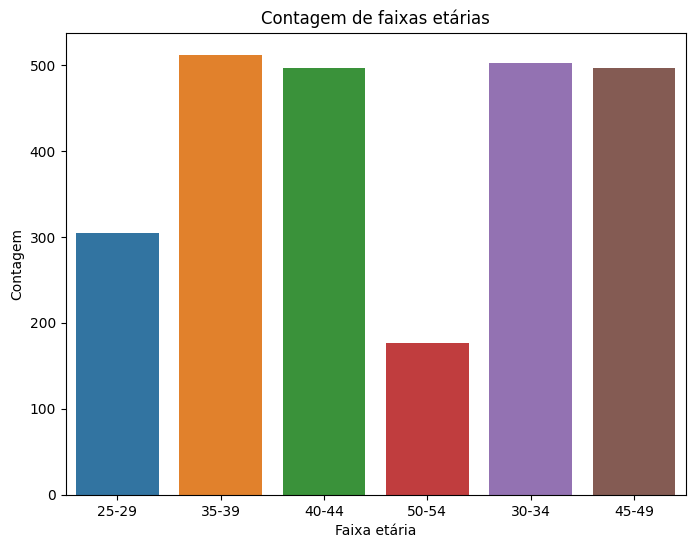

In [55]:
# definir tamanho da figura

plt.figure(figsize=(8, 6))

# instanciar o tipo de plotagem, no caso, um countplot usando x como as faixas etárias

sns.countplot(data = df_netflix,
              x = 'grupo_idade')

# definir texto do título e eixos x e y

plt.title('Contagem de faixas etárias')
plt.xlabel('Faixa etária')
plt.ylabel('Contagem')

plt.show()

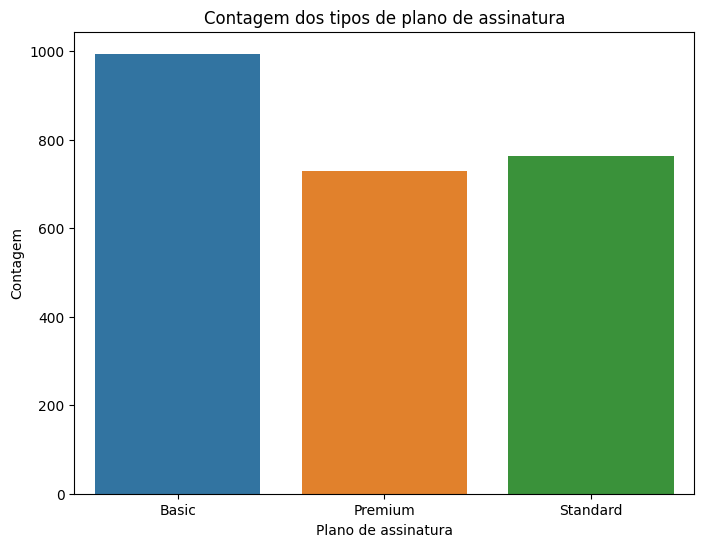

In [54]:
# definir tamanho da figura

plt.figure(figsize=(8, 6))

# instanciar o tipo de plotagem, no caso, um countplot usando x como os tipos de plano

sns.countplot(data = df_netflix,
              x = 'tipo_plano')

# definir texto do título e eixos x e y

plt.title('Contagem dos tipos de plano de assinatura')
plt.xlabel('Plano de assinatura')
plt.ylabel('Contagem')

plt.show()

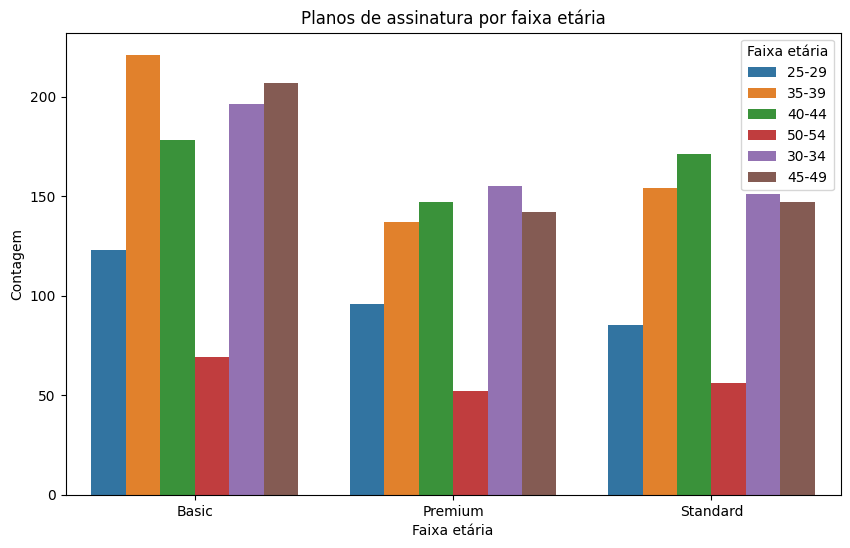

In [65]:
# definir tamanho da figura

plt.figure(figsize=(10, 6))

# instanciar o tipo de plotagem, no caso, um countplot usando x como os tipos
# de plano com tonalidades das barras definidas pela faixa etária

sns.countplot(data = df_netflix,
              x = 'tipo_plano',
              hue = 'grupo_idade')

# definir texto do título e eixos x e y

plt.title('Planos de assinatura por faixa etária')
plt.xlabel('Faixa etária')
plt.ylabel('Contagem')

# plotar e definir texto da legenda

plt.legend(title = 'Faixa etária')

plt.show()

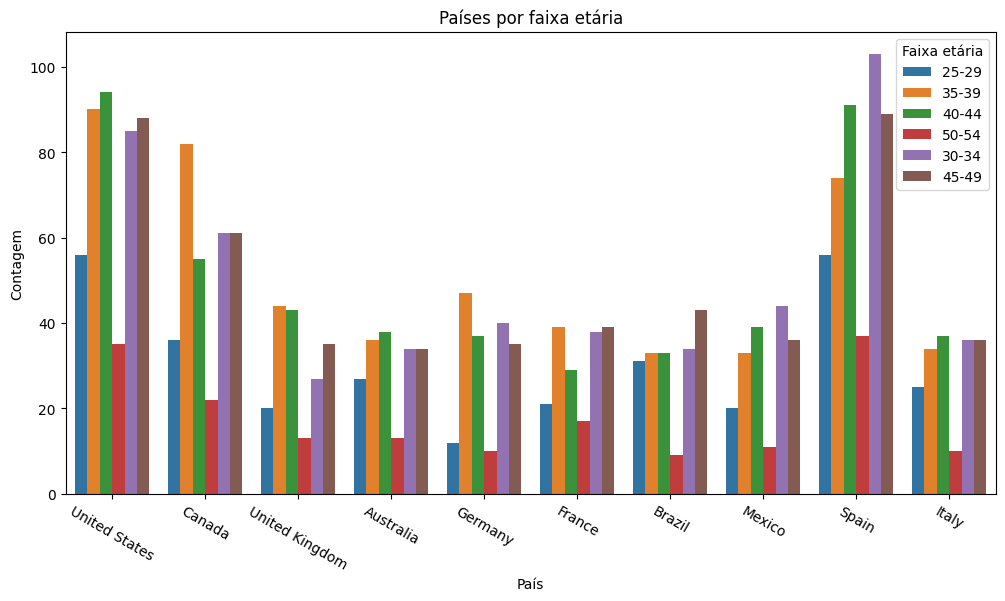

In [62]:
# definir tamanho da figura

plt.figure(figsize=(12, 6))

# instanciar o tipo de plotagem, no caso, um countplot usando x como os países
# com tonalidades das barras definidas pela faixa etária

sns.countplot(data = df_netflix,
              x = 'pais_usuario',
              hue = 'grupo_idade')

# definir texto do título e eixos x e y

plt.title('Países por faixa etária')
plt.xlabel('País')
plt.ylabel('Contagem')

# como o texto do eixo x é longo, podemos rotacioná-lo para melhorar a visualização

plt.xticks(rotation=330)

# plotar e definir texto da legenda

plt.legend(title = 'Faixa etária')

plt.show()

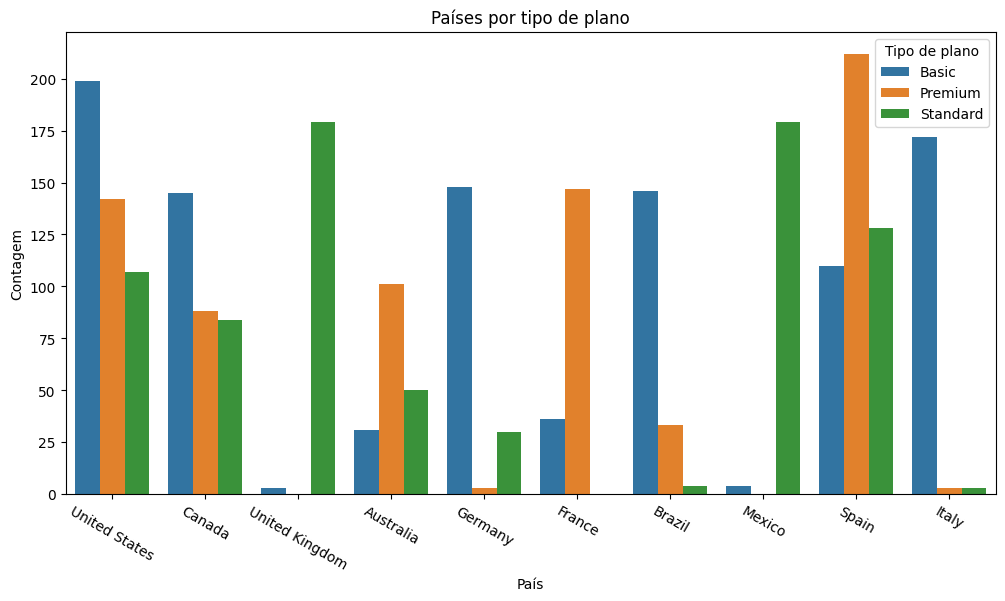

In [63]:
# definir tamanho da figura

plt.figure(figsize=(12, 6))

# instanciar o tipo de plotagem, no caso, um countplot usando x como os países
# com tonalidades das barras definidas pelo tipo de plano

sns.countplot(data = df_netflix,
              x = 'pais_usuario',
              hue = 'tipo_plano')

# definir texto do título e eixos x e y

plt.title('Países por tipo de plano')
plt.xlabel('País')
plt.ylabel('Contagem')

# como o texto do eixo x é longo, podemos rotacioná-lo para melhorar a visualização

plt.xticks(rotation=330)

# plotar e definir texto da legenda

plt.legend(title = 'Tipo de plano')

plt.show()

# Hora de praticar

Agora é sua vez de colocar a mão na massa! Em grupos, respondam as seguintes perguntas sobre os dados:

1. Quantos usuários utilizam a Netflix pelo Tablet?
2. Qual é a representatividade (em %) do sistema operacional mais utilizado para assistir Netflix?
3. Crie visualizações que responda as seguintes perguntas:
    1. Qual é o sistema operacional mais usado para cada faixa etária? Existe algum padrão? O tipo de aparelho muda de acordo com o grupo de idade?
    2. No Brasil, qual é o sistema operacional mais utilizado?